In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import states_name as states
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

plt.style.use("seaborn-colorblind")

In [138]:
#zillow columns to use
# zillow_cols = ['RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro','StateCodeFIPS','MunicipalCodeFIPS']
zillow_cols = ['SizeRank','RegionName','State']

#change available dates to COVID dates
start_date = '2019-12-31'
end_date = '2021-02-28'
list_dates = pd.date_range(start_date,end_date, 
              freq='M').strftime("%Y-%m-%d").tolist()

zillow_cols.extend(list_dates)

In [139]:
#read data from zillow and covid
zillow_df = pd.read_csv('data/zhvi_by_county_all_homes.csv', usecols=zillow_cols)
cov = pd.read_csv('data/covid_by_us_counties.csv')
pd.set_option('display.max_columns', None)

#state/county info
states_df = pd.read_csv('data/states.csv')
landmass_df = pd.read_csv('data/county_landmass.csv')
population_df = pd.read_csv('data/county-pop-2019.csv')
population_df['county-state'] = population_df['county-state'].str.replace(' County','')

In [140]:
cov_df = cov.merge(states_df,how='left', left_on='state', right_on='state')
cov_df['county-state'] = cov_df['county'] + ", " + cov_df['code']
cov_df.drop(['state','county','code'], axis=1, inplace=True)


In [141]:
#combine county and state code
zillow_df['county-state'] = zillow_df['RegionName'] + ", " + zillow_df['State']


In [142]:
#Zillow change in typical value for 6 months and cumulative months.
zillow_df['diff-6'] = zillow_df['2020-07-31'] - zillow_df['2020-01-31'] 
zillow_df['diff-cumulative'] = zillow_df['2021-02-28'] - zillow_df['2020-01-31']
zillow_df['county-state'] = zillow_df['county-state'].str.replace(' County','')
zillow_df.head()

,SizeRank,RegionName,State,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,county-state,diff-6,diff-cumulative
0,0,Los Angeles County,CA,"652,445.00","656,768.00","662,606.00","668,339.00","673,426.00","675,389.00","676,740.00","681,907.00","689,445.00","697,854.00","704,702.00","711,230.00","717,096.00","722,650.00","728,703.00","Los Angeles, CA","25,139.00","71,935.00"
1,1,Cook County,IL,"253,611.00","254,567.00","254,866.00","255,510.00","255,556.00","256,071.00","256,789.00","258,126.00","259,837.00","262,280.00","264,910.00","267,224.00","269,336.00","270,973.00","273,625.00","Cook, IL","3,559.00","19,058.00"
2,2,Harris County,TX,"200,806.00","200,791.00","201,119.00","202,085.00","203,217.00","204,199.00","204,923.00","205,836.00","206,945.00","208,785.00","210,556.00","212,743.00","214,886.00","217,409.00","220,051.00","Harris, TX","5,045.00","19,260.00"
3,3,Maricopa County,AZ,"291,097.00","292,733.00","294,850.00","297,478.00","301,550.00","304,743.00","307,714.00","310,657.00","314,576.00","319,269.00","324,372.00","329,853.00","335,569.00","342,202.00","348,717.00","Maricopa, AZ","17,924.00","55,984.00"
4,4,San Diego County,CA,"606,929.00","610,781.00","615,269.00","620,442.00","624,442.00","628,566.00","631,516.00","635,497.00","641,772.00","651,044.00","661,426.00","671,730.00","682,019.00","692,547.00","702,933.00","San Diego, CA","24,716.00","92,152.00"


In [143]:
#rearrange Zillow DF columns
new_cols = ['SizeRank','county-state','diff-6','diff-cumulative']
new_cols.extend(list_dates)

zillow_df = zillow_df[new_cols]
zillow_df['county-state'].replace('New York, NY','New York City, NY',inplace=True)
zillow_df.sort_values('diff-cumulative').head()

,SizeRank,county-state,diff-6,diff-cumulative,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
19,19,"New York City, NY","-16,026.00","-44,222.00","969,767.00","971,956.00","970,939.00","965,981.00","965,332.00","962,471.00","961,341.00","955,930.00","954,276.00","952,706.00","953,368.00","948,262.00","942,040.00","933,515.00","927,734.00"
65,65,"San Francisco, CA","-22,495.00","-44,025.00","1,458,716.00","1,459,481.00","1,462,211.00","1,459,139.00","1,460,019.00","1,453,274.00","1,445,303.00","1,436,986.00","1,436,739.00","1,439,376.00","1,434,386.00","1,429,800.00","1,421,889.00","1,420,210.00","1,415,456.00"
496,496,"Gregg, TX","-17,906.00","-24,026.00","178,693.00","179,481.00","175,930.00","171,952.00","167,291.00","164,429.00","162,422.00","161,575.00","161,174.00","160,390.00","159,654.00","157,610.00","156,309.00","154,713.00","155,455.00"
2774,2867,"Pope, IL","-7,495.00","-20,200.00","147,871.00","148,371.00","147,474.00","146,417.00","144,518.00","143,039.00","142,138.00","140,876.00","139,460.00","137,490.00","135,696.00","133,595.00","132,106.00","130,014.00","128,171.00"
2047,2060,"Lawrence, KY","-6,091.00","-15,872.00","144,857.00","145,756.00","145,339.00","144,144.00","142,642.00","141,839.00","140,618.00","139,665.00","138,398.00","136,889.00","135,260.00","133,817.00","132,578.00","131,018.00","129,884.00"


In [144]:
zillow_melt_df = pd.melt(zillow_df, id_vars=['SizeRank','county-state'],value_vars=list_dates,var_name='date', value_name='zhvi')
zillow_melt_df[zillow_melt_df['county-state'] == 'Los Angeles, CA']
zillow_melt_df.sort_values(['SizeRank','date'],inplace=True)


In [145]:
# s_cov = set(cov_df['county-state'])
# s_zil = set(zillow_df[zillow_df['SizeRank']<101]['county-state'])

In [146]:
# s_zil - s_cov

'''{'Baltimore City, MD',
 'Bronx, NY',
 'Dekalb, GA',
 'Kings, NY',
 'New York, NY',
 'Prince Georges, MD',
 'Queens, NY',
 'Saint Louis, MO'}'''

"{'Baltimore City, MD',\n 'Bronx, NY',\n 'Dekalb, GA',\n 'Kings, NY',\n 'New York, NY',\n 'Prince Georges, MD',\n 'Queens, NY',\n 'Saint Louis, MO'}"

In [147]:
cov_df[cov_df['date'].isin(list_dates)]

,date,fips,cases,deaths,county-state
33,2020-01-31,"4,013.00",1,0.00,"Maricopa, AZ"
34,2020-01-31,"6,037.00",1,0.00,"Los Angeles, CA"
35,2020-01-31,"6,059.00",1,0.00,"Orange, CA"
36,2020-01-31,"6,085.00",1,0.00,"Santa Clara, CA"
37,2020-01-31,"17,031.00",2,0.00,"Cook, IL"
...,...,...,...,...,...
1076219,2021-02-28,"56,037.00",3759,34.00,"Sweetwater, WY"
1076220,2021-02-28,"56,039.00",3351,9.00,"Teton, WY"
1076221,2021-02-28,"56,041.00",2053,12.00,"Uinta, WY"
1076222,2021-02-28,"56,043.00",880,26.00,"Washakie, WY"


In [148]:
ye_df = pd.DataFrame(cov_df['county-state'].unique(), columns=['county-state'])
ye_df['date'] = '2019-12-31'
ye_df['cases'] = 0
ye_df['deaths'] = 0


In [149]:
cov_df2 = cov_df.append(ye_df)
cov_df2.sort_values(['county-state','date'],inplace=True)


In [150]:
combined_df = pd.merge(cov_df2, zillow_melt_df,  how='inner', left_on=['date','county-state'], right_on = ['date','county-state'])

In [151]:
pd.set_option('display.max_rows', 10000)
combined_df[combined_df['county-state']=='New York City, NY']


,date,fips,cases,deaths,county-state,SizeRank,zhvi
22728,2019-12-31,NaN,0,0.00,"New York City, NY",19,"969,767.00"
22729,2020-03-31,NaN,43518,"1,475.00","New York City, NY",19,"965,981.00"
22730,2020-04-30,NaN,172784,"17,809.00","New York City, NY",19,"965,332.00"
22731,2020-05-31,NaN,208085,"21,050.00","New York City, NY",19,"962,471.00"
22732,2020-06-30,NaN,219844,"22,566.00","New York City, NY",19,"961,341.00"
22733,2020-07-31,NaN,229834,"23,002.00","New York City, NY",19,"955,930.00"
22734,2020-08-31,NaN,238938,"23,695.00","New York City, NY",19,"954,276.00"
22735,2020-09-30,NaN,248738,"23,823.00","New York City, NY",19,"952,706.00"
22736,2020-10-31,NaN,267929,"24,001.00","New York City, NY",19,"953,368.00"
22737,2020-11-30,NaN,316724,"24,274.00","New York City, NY",19,"948,262.00"


In [152]:
combined_df['otm-cases'] = combined_df[combined_df['county-state']=='Los Angeles, CA'].cases.diff()
combined_df.fillna(0, inplace=True)
combined_df[combined_df['county-state']=='Los Angeles, CA']

,date,fips,cases,deaths,county-state,SizeRank,zhvi,otm-cases
18763,2019-12-31,0.00,0,0.00,"Los Angeles, CA",0,"652,445.00",0.00
18764,2020-01-31,"6,037.00",1,0.00,"Los Angeles, CA",0,"656,768.00",1.00
18765,2020-02-29,"6,037.00",1,0.00,"Los Angeles, CA",0,"662,606.00",0.00
18766,2020-03-31,"6,037.00",3011,54.00,"Los Angeles, CA",0,"668,339.00","3,010.00"
18767,2020-04-30,"6,037.00",23182,"1,111.00","Los Angeles, CA",0,"673,426.00","20,171.00"
18768,2020-05-31,"6,037.00",54996,"2,362.00","Los Angeles, CA",0,"675,389.00","31,814.00"
18769,2020-06-30,"6,037.00",103529,"3,369.00","Los Angeles, CA",0,"676,740.00","48,533.00"
18770,2020-07-31,"6,037.00",188481,"4,621.00","Los Angeles, CA",0,"681,907.00","84,952.00"
18771,2020-08-31,"6,037.00",241768,"5,784.00","Los Angeles, CA",0,"689,445.00","53,287.00"
18772,2020-09-30,"6,037.00",270299,"6,576.00","Los Angeles, CA",0,"697,854.00","28,531.00"


In [153]:
# Number of counties in combined DF
len(combined_df['county-state'].unique())

2719

/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


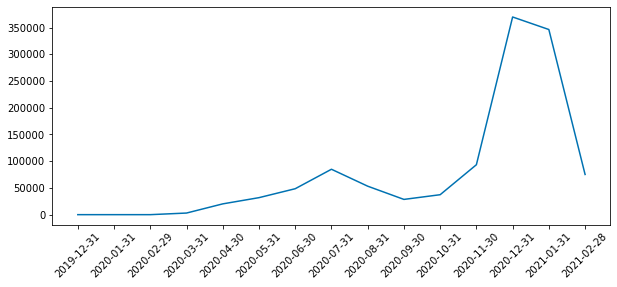

In [154]:
fig, ax = plt.subplots(figsize=(10,4))
x_date = combined_df[combined_df['county-state']=='Los Angeles, CA']['date']
y_cases = combined_df[combined_df['county-state']=='Los Angeles, CA']['otm-cases']

ax.set_xticklabels(x_date,rotation=45)
ax.plot(x_date, y_cases)

/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


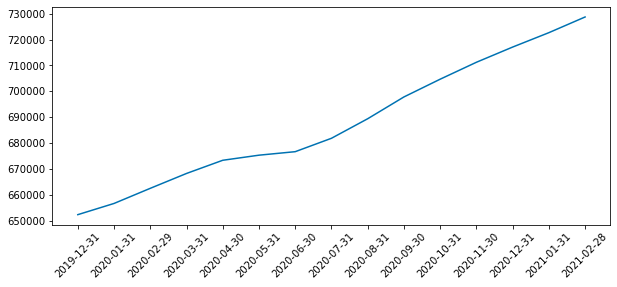

In [155]:
fig, ax = plt.subplots(figsize=(10,4))
y_zhvi = combined_df[combined_df['county-state']=='Los Angeles, CA']['zhvi']
ax.set_xticklabels(combined_df[combined_df['county-state']=='Los Angeles, CA']['date'],rotation=45)
ax.plot(x_date, y_zhvi)

In [156]:
y_cases.corr(y_zhvi, method='pearson')

0.6757854895680049

In [157]:
def county_corr(county):
    
    df = combined_df.copy()
    
    df['otm-cases'] = df[df['county-state']==county].cases.diff()
    df.fillna(0, inplace=True)    
    
    y_cases = df[df['county-state']==county]['otm-cases']
    y_zhvi = df[df['county-state']==county]['zhvi']
    
    return y_cases.corr(y_zhvi, method='pearson')


In [158]:
# to test county_corr defined function
county1 = 'San Francisco, CA'

print(f'Correlation based on function: {county_corr(county1)}')

cases = combined_df[combined_df['county-state']==county1]['otm-cases']
zhvi = combined_df[combined_df['county-state']==county1]['zhvi']

cases.corr(zhvi, method='pearson')
print(f'Correlation based on filter: {county_corr(county1)}')

Correlation based on function: -0.7790401283278209
Correlation based on filter: -0.7790401283278209


In [159]:
compiled_corr_df = pd.DataFrame(combined_df['county-state'].unique(),columns=['county-state'])

In [160]:
compiled_corr_df['correlation'] =  compiled_corr_df['county-state'].apply(county_corr)


In [161]:
compiled_corr_df = pd.merge(compiled_corr_df, zillow_df[['SizeRank','county-state']], how='left', left_on='county-state', right_on='county-state')
compiled_corr_df = pd.merge(compiled_corr_df, landmass_df[['county-state','land_sq_mi']], how='left', left_on='county-state', right_on='county-state')
compiled_corr_df = pd.merge(compiled_corr_df, population_df, how='left', left_on='county-state', right_on='county-state')

In [162]:
compiled_corr_df['pop-density'] = compiled_corr_df['POPESTIMATE2019'] / compiled_corr_df['land_sq_mi']
compiled_corr_df["rank-pop-dense"] = compiled_corr_df['pop-density'].rank(ascending=False)
compiled_corr_df.sort_values("rank-pop-dense").head()

,county-state,correlation,SizeRank,land_sq_mi,POPESTIMATE2019,pop-density,rank-pop-dense
2189,"San Francisco, CA",-0.78,65,46.69,"881,549.00","18,880.90",1.00
1142,"Hudson, NJ",0.59,93,46.69,"672,391.00","14,401.18",2.00
2347,"Suffolk, MA",0.66,79,58.52,"803,907.00","13,737.30",3.00
1966,"Philadelphia, PA",0.60,20,135.09,"1,584,064.00","11,725.99",4.00
77,"Arlington, VA",0.71,297,25.87,"236,842.00","9,155.08",5.00


/Users/tonymbp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='correlation', ylabel='rank-pop-dense'>

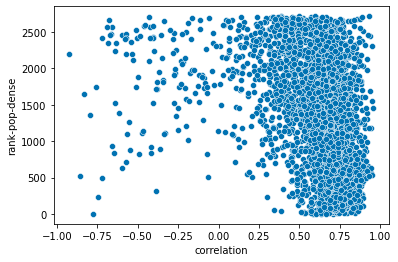

In [163]:
sns.scatterplot(compiled_corr_df['correlation'], compiled_corr_df['rank-pop-dense'])

In [164]:
compiled_corr_df[compiled_corr_df['SizeRank']<100].sort_values('correlation', ascending=True).head(10)
# compiled_corr_df.sort_values('correlation').head(100
                                                 

,county-state,correlation,SizeRank,land_sq_mi,POPESTIMATE2019,pop-density,rank-pop-dense
2189,"San Francisco, CA",-0.78,65,46.69,"881,549.00","18,880.90",1.00
1806,"New York City, NY",-0.62,19,NaN,NaN,NaN,NaN
1119,"Honolulu, HI",0.34,42,599.77,"974,563.00","1,624.89",56.00
2600,"Wayne, MI",0.51,14,614.15,"1,749,343.00","2,848.40",22.00
1083,"Hennepin, MN",0.56,33,556.62,"1,265,843.00","2,274.16",33.00
2620,"Westchester, NY",0.57,43,432.82,"967,506.00","2,235.35",35.00
1789,"Nassau, NY",0.58,26,286.69,"1,356,924.00","4,733.07",12.00
1356,"Lake, IL",0.58,83,447.56,"696,535.00","1,556.29",65.00
1142,"Hudson, NJ",0.59,93,46.69,"672,391.00","14,401.18",2.00
1683,"Milwaukee, WI",0.60,44,241.56,"945,726.00","3,915.08",15.00


In [165]:
compiled_corr_df[compiled_corr_df['SizeRank']<100].sort_values('correlation', ascending=False).head(10)

,county-state,correlation,SizeRank,land_sq_mi,POPESTIMATE2019,pop-density,rank-pop-dense
675,"Denton, TX",0.89,90,888.54,"887,207.00",998.50,113.00
1232,"Jefferson, KY",0.86,77,385.09,"766,757.00","1,991.11",44.00
2521,"Wake, NC",0.83,55,831.92,"1,111,761.00","1,336.38",80.00
530,"Collin, TX",0.82,73,847.56,"1,034,730.00","1,220.83",90.00
2388,"Tarrant, TX",0.82,15,863.42,"2,102,515.00","2,435.10",30.00
766,"Erie, NY",0.80,49,"1,044.21","918,702.00",879.81,123.00
632,"Dallas, TX",0.80,8,879.60,"2,635,516.00","2,996.27",20.00
513,"Cobb, GA",0.79,85,340.15,"760,141.00","2,234.72",36.00
1703,"Monmouth, NJ",0.79,94,471.94,"618,795.00","1,311.17",81.00
2294,"Snohomish, WA",0.79,82,"2,089.06","822,083.00",393.52,275.00


In [166]:
combined_df.head()

,date,fips,cases,deaths,county-state,SizeRank,zhvi,otm-cases
0,2019-12-31,0.00,0,0.00,"Abbeville, SC",1589,"122,823.00",0.00
1,2020-03-31,"45,001.00",4,0.00,"Abbeville, SC",1589,"122,977.00",0.00
2,2020-04-30,"45,001.00",31,0.00,"Abbeville, SC",1589,"123,479.00",0.00
3,2020-05-31,"45,001.00",42,0.00,"Abbeville, SC",1589,"124,013.00",0.00
4,2020-06-30,"45,001.00",113,0.00,"Abbeville, SC",1589,"124,521.00",0.00


# Correlation for entire USA

In [176]:
zhvi_usa = zillow_melt_df.groupby('date')['zhvi'].mean().reset_index()

In [177]:
cases_usa = cov_df2.groupby('date')['cases'].sum().reset_index()

In [178]:
combined_usa = pd.merge(zhvi_usa, cases_usa,  how='left', left_on=['date'], right_on = ['date'])

In [173]:
combined_usa['mtm-cases'] = combined_usa.cases.diff()
combined_usa.fillna(0, inplace=True)

In [174]:
combined_usa

,date,zhvi,cases,mtm-cases
0,2019-12-31,"172,054.51",0,0.00
1,2020-01-31,"172,424.85",7,7.00
2,2020-02-29,"172,963.34",70,63.00
3,2020-03-31,"173,450.98",188461,"188,391.00"
4,2020-04-30,"173,866.35",1075758,"887,297.00"
5,2020-05-31,"174,375.17",1799302,"723,544.00"
6,2020-06-30,"174,946.43",2653321,"854,019.00"
7,2020-07-31,"175,654.87",4571669,"1,918,348.00"
8,2020-08-31,"176,507.01",6045455,"1,473,786.00"
9,2020-09-30,"177,511.41",7262734,"1,217,279.00"


In [175]:
cases_usa = combined_usa['mtm-cases']
zhvi_usa = combined_usa['zhvi']

cases_usa.corr(zhvi_usa, method='pearson')

0.8247587059441013